## Time Series Forecasting - Auto ARIMA

### Import standard packages

In [1]:
## pip install pmdarima

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Import time series data : Airline passenger traffic

In [3]:
data = pd.read_csv('airline-passenger-traffic.csv', header=None)
data.columns = ['Month', 'Passengers']

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       144 non-null    object 
 1   Passengers  140 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [5]:
data.head()

,Month,Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [6]:
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')
data = data.set_index('Month')
data.head(12)

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0
1949-07-01,148.0
1949-08-01,148.0
1949-09-01,136.0


### Time Series Analysis

#### Plot Time Series data

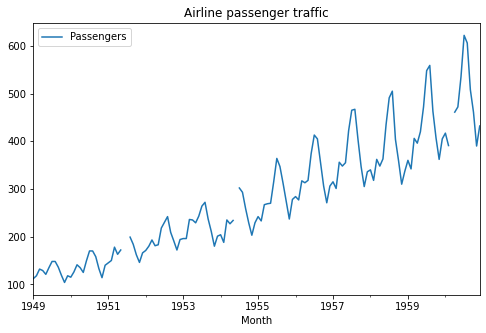

In [7]:
data.plot(figsize=(8,5))
plt.legend(loc='best')
plt.title('Airline passenger traffic')
plt.show(block=False)

#### Missing value treatment method

#### Mean imputation

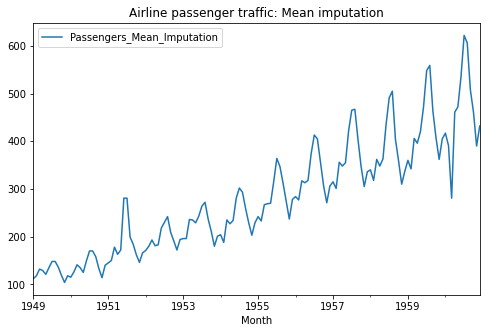

In [8]:
data = data.assign(Passengers_Mean_Imputation=data.Passengers.fillna(data.Passengers.mean()))
data[['Passengers_Mean_Imputation']].plot(figsize=(8,5))
plt.legend(loc='best')
plt.title('Airline passenger traffic: Mean imputation')
plt.show(block=False)

#### Linear Interpolation

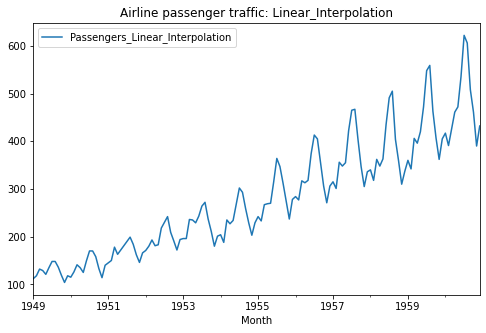

In [9]:
data = data.assign(Passengers_Linear_Interpolation=data.Passengers.interpolate(method='linear'))
data[['Passengers_Linear_Interpolation']].plot(figsize=(8, 5))
plt.legend(loc='best')
plt.title('Airline passenger traffic: Linear_Interpolation')
plt.show(block=False)

#### Use Linear Interpolation to impute missing value

In [10]:
data['Passengers'] = data['Passengers_Linear_Interpolation']

In [11]:
## Dropping the Mean & Linear Interpolation columns as they are redundant
data.drop(columns=['Passengers_Mean_Imputation', 'Passengers_Linear_Interpolation'], inplace=True)
data.head()

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


### Outlier Detection

#### Boxplot and InterQuartile Range

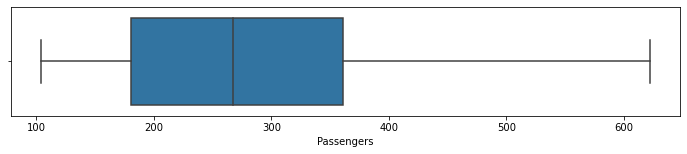

In [12]:
import seaborn as sns
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(x=data['Passengers'], whis=1.5)

#### Histogram plot

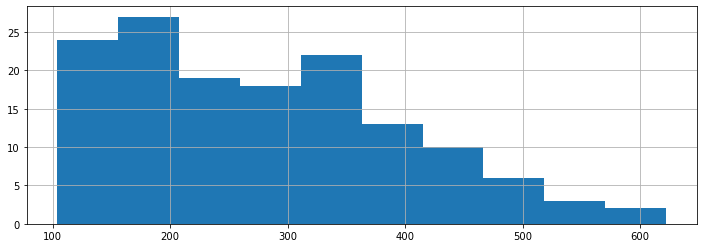

In [13]:
fig = data.Passengers.hist(figsize=(12,4))

No outliers in this time series data

### Stationarity Test

#### Augmented Dickey-Fuller(ADF) Test

In [14]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data['Passengers'])

print('ADF Statistic : %f' % adf_test[0])
print('Critical Value @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value : %f' % adf_test[1])

ADF Statistic : 0.894609
Critical Value @ 0.05: -2.88
p-value : 0.993020


#### KPSS Test

In [15]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data['Passengers'])

print('KPSS Statistic : %f' % kpss_test[0])
print('Critical Value @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value : %f' % kpss_test[1])

KPSS Statistic : 1.052050
Critical Value @ 0.05: 0.46
p-value : 0.010000


### Splitting time series into training and test sets

In [16]:
train_len = 120
train = data[0:train_len]
test = data[train_len:]

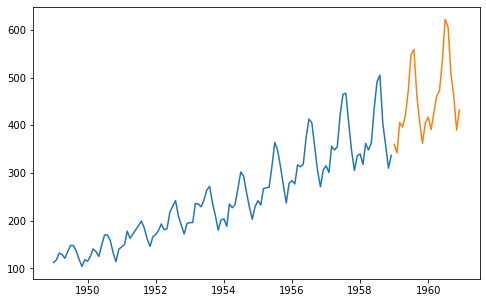

In [17]:
plt.figure(figsize=(8,5))
plt.plot(train)
plt.plot(test)

### Building Auto ARIMA Model

In [18]:
arima_model = auto_arima(train, start_p=0, d=1, start_q=0, max_p=5, max_d=5, max_q=5, start_P=0, D=1, 
                        start_Q=0, max_P=5, max_D=5, max_Q=5, m=12, seasonal=True, error_action='warn',
                        trace=True, suppress_warnings=True, stepwise=True, random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=805.599, Time=0.39 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=805.749, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=805.699, Time=0.28 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=806.670, Time=0.18 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=806.829, Time=0.16 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=808.334, Time=0.32 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=804.392, Time=0.06 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=805.907, Time=0.24 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=806.842, Time=0.57 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=806.300, Time=0.13 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=802.998, Time=0.14 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=804.296, Time=0.33 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=804.423, Time=0.55 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=805.713, Time=0.93 sec
 ARIMA(0,1,1)(0,1,0)[12]         

In [19]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  120
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 12)   Log Likelihood                -398.499
Date:                             Thu, 11 Nov 2021   AIC                            802.998
Time:                                     21:04:15   BIC                            811.016
Sample:                                          0   HQIC                           806.248
                                             - 120                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7089      0.138      5.129      0.000       0.438       0.980
ma.L1         -0.8925      0.100     -8.953      0.000      -1.088      -0.697
sigma2       100.2887     14.271      7.027      0.000      72.317     128.260
===================================================================================
Ljung-Box (Q):                       40.27   Jarque-Bera (JB):                 1.68
Prob(Q):                              0.46   Prob(JB):                         0.43
Heteroskedasticity (H):               1.41   Skew:                            -0.12
Prob(H) (two-sided):                  0.30   Kurtosis:                         3.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Forecasting on the test data

In [20]:
prediction = pd.DataFrame(arima_model.predict(n_periods=24), index=test.index)
prediction.columns = ['Predicted_Passengers']
prediction.head()

,Predicted_Passengers
Month,
1959-01-01,344.688375
1959-02-01,325.303098
1959-03-01,371.156699
1959-04-01,358.470734
1959-05-01,374.402265


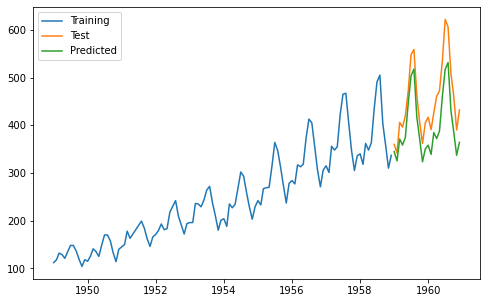

In [21]:
plt.figure(figsize=(8,5))
plt.plot(train, label='Training')
plt.plot(test, label='Test')
plt.plot(prediction, label='Predicted')
plt.legend(loc='Left corner')
plt.show()

In [22]:
from sklearn.metrics import r2_score
test['Predicted_Passengers'] = prediction
r2_score(test['Passengers'], test['Predicted_Passengers'])

0.3915638858465519